# Библиотеки

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils

In [2]:
# run this function if you need to generate a csv data set from scratch
#data_loader.generate_csv_dataset()

In [3]:
X, y, ID = data_loader.load_dataset()

data loaded in 0.02217841148376465ms
          0         1         2         3         4         5         6  \
0  0.303588 -0.523626 -0.651190 -1.467650 -0.572507 -0.280386 -1.388246   
1 -0.484031 -0.262126  0.091142 -1.006777 -0.035807 -0.231770 -0.857022   
2 -0.957440  0.698818 -0.176248 -0.617123 -0.010873  0.925743  0.071460   
3  0.902663 -1.304844 -0.068376 -1.963072 -0.379324 -0.518108 -1.383540   
4  0.506352 -1.478475 -0.688782 -1.687141 -0.489462 -0.443938 -1.347390   

          7         8         9  ...        70        71        72        73  \
0 -0.950745 -2.033666  0.623800  ...  0.116454  1.707008  0.930117  0.145040   
1 -0.493470 -1.053105  0.319601  ...  2.131210  1.565413  0.606471  0.574687   
2 -0.362686 -0.772299  0.671955  ...  0.986818  1.921790  1.916645  2.079151   
3 -0.763318 -2.130993  0.063363  ... -0.442807 -0.534647  0.323451  0.133644   
4 -0.153102 -1.409550  0.290466  ... -0.621059  0.381151  0.202425 -0.084719   

         74        75        76

In [4]:
ID['0'].unique()    # actors

array([22,  9, 18,  6, 24,  3, 21, 12, 14, 15,  5, 20, 23,  4,  8, 13, 11,
       10,  7,  2, 19,  1, 17, 16])

In [5]:
group_members= data_loader.get_k_fold_group_member()


X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
print(len(X_k_folds))

5


## SVM with Linear kernel

In [12]:
# Train & evaluate cycle
y_pred = []
y_true = []

for k in tqdm(X_k_folds.keys()):    
    # Prepare dataset
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()    
    for i in X_k_folds.keys():        
        if (i!=k):
            X_train = pd.concat([X_train, X_k_folds[i]])
            y_train = pd.concat([y_train, y_k_folds[i]])
        else:
            X_test = X_k_folds[i]
            y_test = y_k_folds[i]
    SVM = SVC(kernel = 'linear', C=0.1)
    SVM.fit(X_train.values, y_train.values.ravel())
    y_pred_k_fold = SVM.predict(X_test.values)

    y_pred = np.concatenate((y_pred, y_pred_k_fold), axis=None)
    y_true = np.concatenate((y_true, y_test.values), axis=None)

UAR = model_evaluation.calculate_uar(y_true, y_pred)
print(f'UAR = {UAR:.3f}')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 17.97it/s]

UAR = 0.438


## Results and confusion matrix

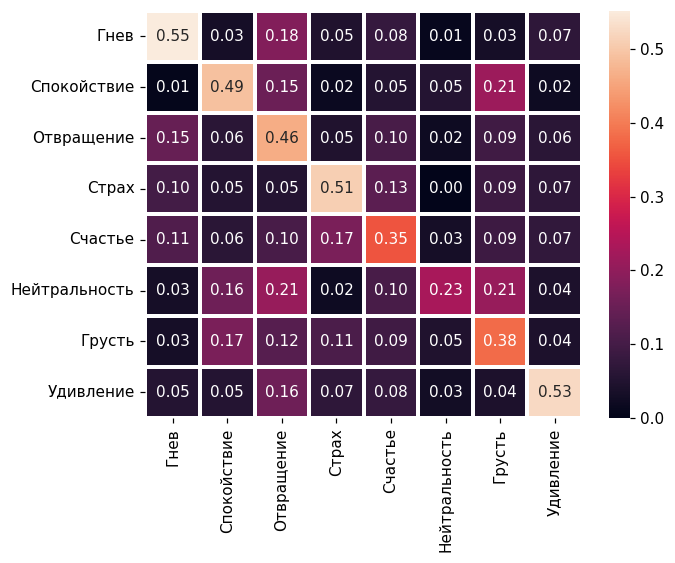

Saving confusion matrix with name:  Doc/figures/confusion_matrix.jpg


In [14]:
plotting_utils.plot_confusion_matrix(y_test, y_true, y_pred)